In [2]:
# CMPT459 2020 spring
# milestone1: EDA on rental listing inquiries
# group name: Salt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

train = pd.read_json('train.json')
test = pd.read_json('test.json')

# Exploratory data analysis

In [311]:
#Plot histograms for the following numeric columns: Price, Latitude & Longitude.
#Plot hour-wise listing trend and find out the top 5 busiest hours of postings.
#Visualization to show the proportion of target variable values.

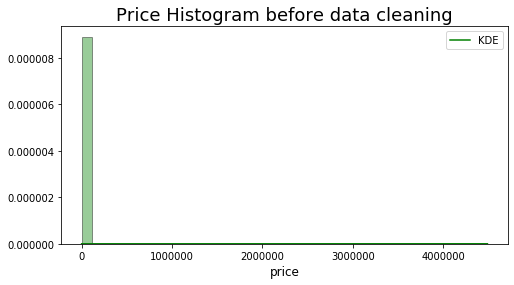

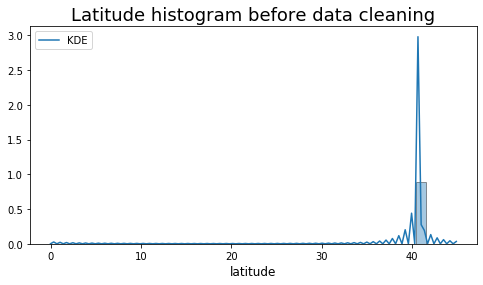

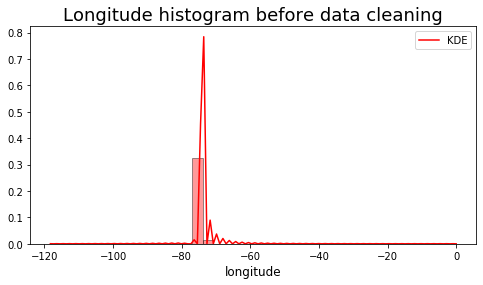

In [312]:
#plot the price histogram before data cleaning
plt.figure(figsize=(8,4))
sns.distplot(train.price.values, color='g', bins=40, hist_kws=dict(edgecolor='k'), kde=True, kde_kws={"label":"KDE"})
plt.title('Price Histogram before data cleaning', fontsize=18)
plt.xlabel('price', fontsize=12)
plt.show()

#plot the latitude histogram before data cleaning
plt.figure(figsize=(8,4))
sns.distplot(train.latitude.values, bins=40, hist_kws=dict(edgecolor='k'), kde=True, kde_kws={"label":"KDE"})
plt.title('Latitude histogram before data cleaning', fontsize=18)
plt.xlabel('latitude', fontsize=12)
plt.show()

#plot the longitude histogram before data cleaning
plt.figure(figsize=(8,4))
sns.distplot(train.longitude.values, bins=40, color='red',hist_kws=dict(edgecolor='k'), kde=True, kde_kws={"label":"KDE"})
plt.title('Longitude histogram before data cleaning', fontsize=18)
plt.xlabel('longitude', fontsize=12)
plt.show()


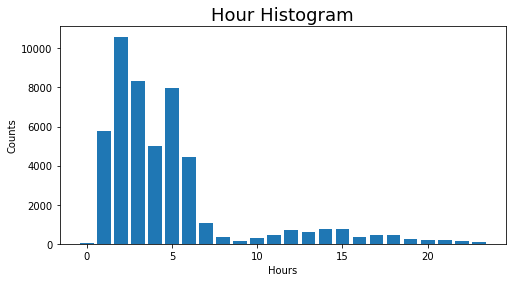

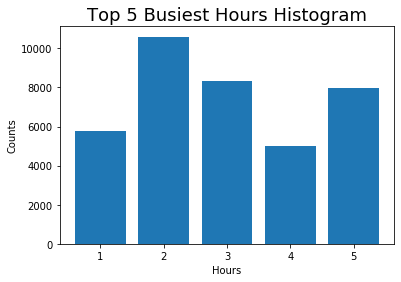

The top 5 busiest hours of postings:
Hours  Counts
2    10596
3     8318
5     7954
1     5749
4     5021
Name: created, dtype: int64


In [313]:
#Plot hour-wise listing trend and find out the top 5 busiest hours of postings.
hour=pd.to_datetime(train['created']).dt.hour.value_counts()
plt.figure(figsize=(8,4))
plt.bar(hour.index, hour.values)
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.title('Hour Histogram', fontsize=18)
plt.show()

plt.bar(hour.nlargest(5).index,hour.nlargest(5).values)
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.title('Top 5 Busiest Hours Histogram', fontsize=18)
plt.show()
print('The top 5 busiest hours of postings:')
print('Hours  Counts')
print(hour.nlargest(5))

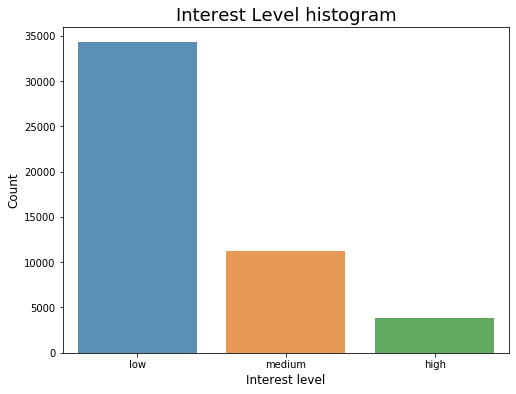

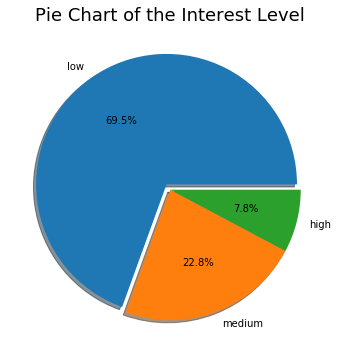

In [314]:
interest_l = train['interest_level'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(interest_l.index, interest_l.values, alpha=0.8)
plt.title('Interest Level histogram', fontsize=18)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#Visualization to show the proportion of target variable values
Interests = train['interest_level'].value_counts()
colors = ["#D69A80", "#E13F29", "#AE5552"]
plt.figure(figsize=(6,6))
explode=[0.05,0,0]
plt.pie(Interests.values,explode=explode,labels=['low','medium','high'],autopct='%1.1f%%',shadow=True)
plt.title('Pie Chart of the Interest Level', fontsize=18)
plt.show()

# Dealing with missing values, outliers

In [274]:
#Find out the number of missing values in each variable.
#Find out the number of outliers in each variable. 
#Plot visualizations to demonstrate them. You can either remove the outliers or provide a short argument as to why outlier detection is not meaningful for that attribute.
#Can we safely drop the missing values? If not, how will you deal with them?

In [315]:
#Find out the number of missing values in each variable.
print("The number of missing values in bathroom:", len(train[(train['bathrooms'] == 0.0)]))
print("The number of missing values in bedroom:", len(train[(train['bedrooms'] == 0)]))
print("The number of missing values in buildingID:", len(train[train['building_id'] == "0"]))
print("The number of missing values in created:", train['created'].isnull().sum())
print("The number of missing values in description:", train['description'].isnull().sum())
print("The number of missing values in display_address:", train['display_address'].isnull().sum())
print("The number of missing values in features:", train['features'].isnull().sum())
print("The number of missing values in latitude:", len(train[(train['latitude']==0.0)]))
print("The number of missing values in listingID:", len(train[train['listing_id'] == '0']))
print("The number of missing values in longitude:", len(train[(train['longitude']==0.0)]))
print("The number of missing values in managerID:", len(train[train['manager_id'] == '0']))
print("The number of missing values in photos:", train['photos'].isnull().sum())
print("The number of missing values in price:", len(train[train['price'] == 0]))
print("The number of missing values in street_address:", train['street_address'].isnull().sum())
print("The number of missing values in interest_level:", train['interest_level'].isnull().sum())

The number of missing values in bathroom: 313
The number of missing values in bedroom: 9475
The number of missing values in buildingID: 8286
The number of missing values in created: 0
The number of missing values in description: 0
The number of missing values in display_address: 0
The number of missing values in features: 0
The number of missing values in latitude: 12
The number of missing values in listingID: 0
The number of missing values in longitude: 12
The number of missing values in managerID: 0
The number of missing values in photos: 0
The number of missing values in price: 0
The number of missing values in street_address: 0
The number of missing values in interest_level: 0


C:\AAA\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


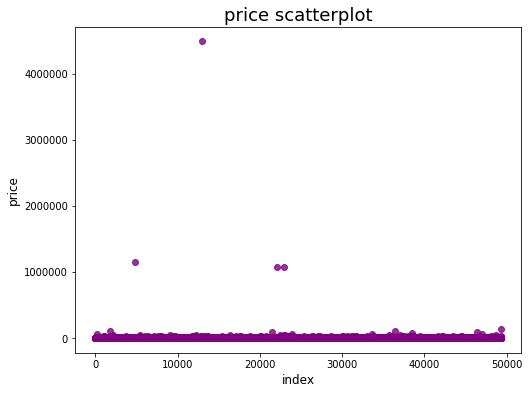

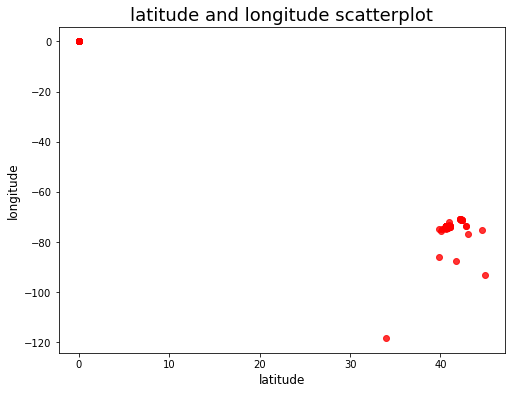

In [316]:
#Find out the number of outliers in each variable. 
#Plot visualizations to demonstrate them. You can either remove the outliers or provide a short argument as to why outlier detection is not meaningful for that attribute.

#plot the price scatterplot to see if there exists outliers
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), train['price'],alpha = 0.8, color = 'purple')
plt.title('price scatterplot', fontsize = 18)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

#We also plot latitude & longitude scatterplot to see if there exists outliers
plt.figure(figsize=(8,6))
plt.scatter(train['latitude'], train['longitude'],alpha = 0.8, color = 'red')
plt.title('latitude and longitude scatterplot', fontsize = 18)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('longitude', fontsize=12)
plt.show()

In [317]:
#outlier detect function: outlier_fd
#To find the upper and lower bounds of outliers with a threshold (0.5 defaulted)
#Use the interquartile range 
#Return the bounds
def outlier_fd(data, threshold=0.5):
    low, high = np.percentile(data,1), np.percentile(data, 99)
    dist = high - low
    cut_off = dist * threshold
    lower, upper = low-cut_off, high+cut_off
    return [lower, upper]

#Find the outlier of price, latitude and longitude using bound given by outlier_fd
#and print the index and value
[price_lower, price_higher] = outlier_fd(train['price'])
outlier_price = train[(train['price']<price_lower)|(train['price']>price_higher)]
print('Total number of outliers in price is:', len(outlier_price))
print('index    value')
print(outlier_price['price'])
#To be more accurate, use threshold = 1
[latitude_lower, latitude_higher] = outlier_fd(train['latitude'],1)
outlier_latitude = train[(train['latitude']<latitude_lower)|(train['latitude']>latitude_higher)]
print('Total number of outliers in latitude is:', len(outlier_latitude))
print('index    value')
print(outlier_latitude['latitude'])
#To be more accurate, use threshold = 1
[longitude_lower, longitude_higher] = outlier_fd(train['longitude'],1)
outlier_longitude = train[(train['longitude']<longitude_lower)|(train['longitude']>longitude_higher)]
print('Total number of outliers in longitude is:', len(outlier_longitude))
print('index    value')
print(outlier_longitude['longitude'])

Total number of outliers in price is: 150
index    value
514        58020
1918       20000
2471       24000
2513       28000
2625       30000
           ...  
120945     30000
121821     27495
122319     50000
123877    135000
123909     30000
Name: price, Length: 150, dtype: int64
Total number of outliers in latitude is: 36
index    value
872       42.3459
2028       0.0000
4719      42.8724
16405     44.6038
18023     41.0868
18267     43.0346
24747     42.3459
37426      0.0000
39046     42.2019
39134      0.0000
39798     34.0126
41022     42.2019
46941      0.0000
49884      0.0000
57131     42.2019
62409     42.3033
63688      0.0000
66197      0.0000
69423      0.0000
70841      0.0000
71920     41.0868
72896     41.7530
73065     42.3033
76934      0.0000
78568     44.8835
80360     42.3459
81815     42.8725
85521      0.0000
85995     42.3459
104822    39.8395
106350     0.0000
108994    40.1159
114028    40.0450
114889    42.2019
117255    42.2509
121891    39.7996
Name: lati

C:\AAA\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


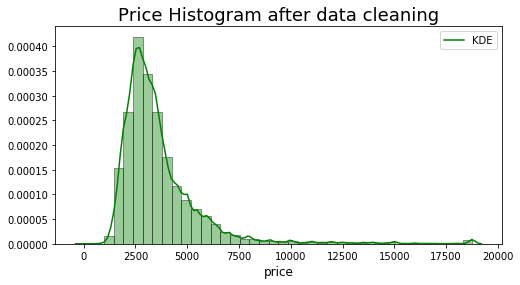

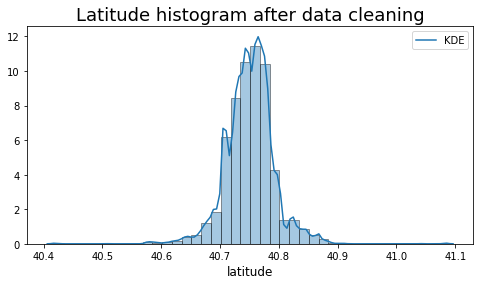

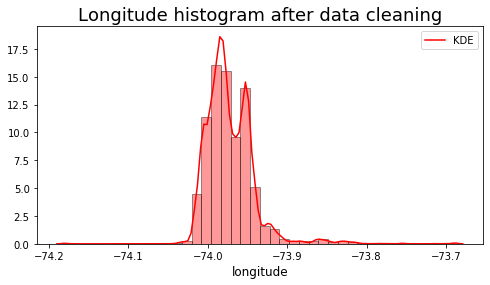

In [318]:
#deal with outliers, set the column for modified data and plot again
train['price_modify'] = train['price']
train['price_modify'].loc[train['price_modify']<price_lower] = price_lower
train['price_modify'].loc[train['price_modify']>price_higher] = price_higher
plt.figure(figsize=(8,4))
sns.distplot(train.price_modify.values, color='g', bins=40, hist_kws=dict(edgecolor='k'), kde=True, kde_kws={"label":"KDE"})
plt.title('Price Histogram after data cleaning', fontsize = 18)
plt.xlabel('price', fontsize=12)
plt.show()

#deal with outliers, set the column for modified data and plot again
train['latitude_modify'] = train['latitude']
train['latitude_modify'].loc[train['latitude_modify']<latitude_lower] = latitude_lower
train['latitude_modify'].loc[train['latitude_modify']>latitude_higher] = latitude_higher
plt.figure(figsize=(8,4))
sns.distplot(train.latitude_modify.values, bins=40, hist_kws=dict(edgecolor='k'), kde=True, kde_kws={"label":"KDE"})
plt.title('Latitude histogram after data cleaning', fontsize = 18)
plt.xlabel('latitude', fontsize=12)
plt.show()

#deal with outliers, set the column for modified data and plot again
train['longitude_modify'] = train['longitude']
train['longitude_modify'].loc[train['longitude']<longitude_lower] = longitude_lower
train['longitude_modify'].loc[train['longitude']>longitude_higher] = longitude_higher
plt.figure(figsize=(8,4))
sns.distplot(train.longitude_modify.values, bins=40, color='red',hist_kws=dict(edgecolor='k'), kde=True, kde_kws={"label":"KDE"})
plt.title('Longitude histogram after data cleaning', fontsize = 18)
plt.xlabel('longitude', fontsize=12)
plt.show()


For price, I plot the price histogram and find there exists some outliers.Thus, I use a outlier_fd function (defined by myself with a standard) to count the number of outliers. The number is 150. These outliers should be removed because they are numerical type and will affect the performance in the classification later.

For latitude & longitude, I plot the latitude & longitude scatterplot and find there exists some outliers.Thus, I use a outlier_fd function (defined by myself with a standard) to count the number of outliers. The number is 36 in latitude and 52 in longitude. However, these outliers shouldn't be removed because they can be reasonable or be fixed by their address(if provided in the data)

For bathrooms, created_hour, bedrooms, manager_id, display_address, street_address, the possible outliers shouldn't be removed because they're reasonable. 

For buildingID, they shouldn't be removed because they are not numerical attribute and they are irrelevant in a sense.

For description, feature and photos, they are complicated at present and should be processed first in the next step (feature extraction). We haven't determine the outliers at present.

# Feature extraction from images and text

In [284]:
#Extract features from the images and transform it into data that’s ready to be used in the model for classification.
def photos_number_counter(x):
    return len(x)
train['photos_number'] = train['photos'].apply(photos_number_counter)

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

image_folder_list = os.listdir("images_sample")
if ".DS_Store" in image_folder_list:
    image_folder_list.remove(".DS_Store")
im=[]
for path in image_folder_list:
    im.append(load_images("images_sample/"+path))

colors=("r", "g", "b")
channel_ids=(0, 1, 2)

#Extract rgb feature from a random image chosen in the zip 
plt.xlim([0, 256])       
for channel_id, c in zip(channel_ids, colors):
    histogram1, bin_edges=np.histogram(im[0][0][:,:,channel_id], bins=256, range=(0,256))
    plt.plot(bin_edges[0:-1], histogram1, color=c)

plt.title("Extract rgb feature from a random image chosen", fontsize = 18)
plt.xlabel("Color values", fontsize = 12)
plt.ylabel("Pixels", fontsize = 12)
plt.show()

#Extract rgb feature from all images chosen in the zip
histogram_temp=[[0 for i in range(256)] for j in range(3)]
histogram=[[0 for i in range(256)] for j in range(3)]

plt.xlim([0, 256])
for i in range(len(im)):
    for j in range(len(im[i])):        
        for channel_id, c in zip(channel_ids, colors):
            histogram_temp[channel_id], bin_edges=np.histogram(im[i][j][:,:,channel_id], bins=256, range=(0,256))
            for k in range(256):
                histogram[channel_id][k]=histogram[channel_id][k]+histogram_temp[channel_id][k]
for channel_id, c in zip(channel_ids, colors):                
    plt.plot(bin_edges[0:-1], histogram[channel_id], color=c)

plt.title("Extract rgb feature from all images chosen", fontsize = 18)
plt.xlabel("Color values", fontsize = 12)
plt.ylabel("Pixels", fontsize = 12)
plt.show()


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'images_sample'

In [3]:
#Extract features from text data using TF_IDF
#Firstly, do feature extraction on 'feature'
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
train['features_modify'] = train['features'].apply(lambda x:" ".join(["_".join(i.split(" "))for i in x]))
tfidf_f = TfidfVectorizer(stop_words=['central_a', 'pre', 'war'], max_features=98)
train_sparse_f = tfidf_f.fit_transform(train['features_modify'])

In [4]:
tfidf_f.get_feature_names()

['_photos',
 'actual_apt',
 'balcony',
 'bike_room',
 'cats_allowed',
 'children',
 'childrens_playroom',
 'common_outdoor_space',
 'common_parking',
 'common_roof_deck',
 'concierge',
 'deck',
 'dining_room',
 'dishwasher',
 'dogs_allowed',
 'doorman',
 'dryer',
 'dryer_in_unit',
 'duplex',
 'eat_in_kitchen',
 'elevator',
 'exclusive',
 'exposed_brick',
 'fireplace',
 'fitness',
 'fitness_center',
 'full',
 'furnished',
 'garage',
 'garden',
 'granite_kitchen',
 'green_building',
 'gym',
 'hardwood',
 'hardwood_floors',
 'high_ceiling',
 'high_ceilings',
 'high_speed_internet',
 'highrise',
 'in_super',
 'in_superintendent',
 'indoor_pool',
 'laundry',
 'laundry_in_building',
 'laundry_in_unit',
 'laundry_room',
 'level',
 'light',
 'live',
 'live_in_super',
 'loft',
 'lounge',
 'lowrise',
 'luxury_building',
 'marble_bath',
 'multi',
 'new_construction',
 'newly_renovated',
 'no_fee',
 'no_pets',
 'on',
 'outdoor',
 'outdoor_areas',
 'outdoor_space',
 'parking',
 'parking_space',
 'p

In [5]:
array1 = train_sparse_f.toarray()

#set a vector column in the dataframe for feature_modify
list_all = []
[rows, cols] = array1.shape
for row in range(rows):
    temp = []
    for value in array1[row]:
        temp.append(value)
    list_all.append(temp)

feature_v = pd.Series(list_all,train.index, name = 'feature_vector')
train['feature_vector'] = feature_v

In [6]:
array1[0]

array([0.        , 0.        , 0.        , 0.        , 0.33299719,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.62372594, 0.35662929, 0.34563892,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33285094,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.37767493, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [322]:
#Secondly, do feature extraction on 'feature' (also using TF_IDF)

#do data cleaning for 'description': remove words that contain characters that don't belong to number or alphabet
def valid_des(s):
    valid_s = " "
    for i in s.split():
        if i.isalnum():
            valid_s = " ".join([valid_s, i])
    return valid_s.strip()

train['description_modify'] = train['description'].apply(lambda x:valid_des(x))
tfidf_d = TfidfVectorizer(stop_words='english', max_features=100)
train_sparse_d = tfidf_d.fit_transform(train['description_modify'])

In [323]:
tfidf_d.get_feature_names()

['24',
 'access',
 'amazing',
 'amenities',
 'apartment',
 'apartments',
 'appliances',
 'area',
 'available',
 'away',
 'bath',
 'bathroom',
 'beautiful',
 'bedroom',
 'bedrooms',
 'best',
 'brand',
 'broker',
 'building',
 'central',
 'city',
 'close',
 'closet',
 'contact',
 'counter',
 'dining',
 'doorman',
 'east',
 'elevator',
 'email',
 'equal',
 'estate',
 'features',
 'fee',
 'fitness',
 'floor',
 'floors',
 'free',
 'granite',
 'great',
 'hardwood',
 'heart',
 'high',
 'home',
 'housing',
 'huge',
 'including',
 'information',
 'just',
 'kitchen',
 'large',
 'laundry',
 'living',
 'located',
 'location',
 'lots',
 'luxury',
 'marble',
 'modern',
 'natural',
 'new',
 'newly',
 'offers',
 'open',
 'outdoor',
 'park',
 'prime',
 'private',
 'real',
 'renovated',
 'restaurants',
 'roof',
 'room',
 'schedule',
 'size',
 'sized',
 'space',
 'spacious',
 'stainless',
 'steel',
 'steps',
 'storage',
 'street',
 'studio',
 'subway',
 'supports',
 'text',
 'today',
 'tons',
 'unit',
 '

In [324]:
array2 = train_sparse_d.toarray()
#set a vector column in the dataframe for description_modify
list_all = []
[rows, cols] = array2.shape
for row in range(rows):
    temp = []
    for value in array2[row]:
        temp.append(value)
    list_all.append(temp)

description_v = pd.Series(list_all,train.index, name = 'description_vector')
train['description_vector'] = description_v

In [1]:
array2[0]

NameError: name 'array2' is not defined